## Programming for Data Analysis Project

**Francesco Troja**

***

#### An analysis of paleo-present climate data

>• Analyse CO2 vs Temperature Anomaly from 800kyrs – present;
>
>• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage);
>
>• Examine Irish context;
>
>• Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats;
>
>• For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis);
>
>• Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue;
>
>• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage).

## Contents

#### Introduction

This project is dedicated to exploring a crucial topic related to an ongoing concern: climate change. The investigation examines various aspects of climate change, such as the CO2 and atmospheric carbon dioxide and temperature anomaly, seeking to understand its impact, causes. Climate change has become a pressing global issue with far-reaching consequences for ecosystems, weather patterns, and human societies. Through data analysis and visualizations, the project aims to contribute valuable insights into the dynamics of climate change. The documentation will provide a comprehensive overview of the project's objectives, methodologies and findings.

The research project is structured into three distinct parts. The initial phase will primarily focus on the analysis of the relationship between CO2 levels and Temperature Anomaly over a span of 800,000 years to the present. Various datasets related to CO2 and Temperature will be imported and thoroughly examined. Ultimately, the dataset that aligns most effectively with the research objectives will be selected for further utilization. Additionally, an exploration of another relevant feature will be conducted to enhance our understanding of the climate change scenario. 

Moving on to the second part, the research scope will transition from a global perspective to a more localized examination, specifically analyzing the impact of climate and temperature changes on Ireland.

In the third and final segment of the research, the objective is to predict global temperature anomalies over the next few decades through data synthesis. This involves comparing the synthesized data with published climate models, considering the potential continuation of atmospheric CO2 trends.

#### Import Python Libraries


To execute this project, several Python libraries have been utilized. These libraries were chosen for their specific functionalities and capabilities, tailored to the requirements of the project:

- `pandas`: The library's powerful data structures, including DataFrames and Series, allowed for efficient organization and structuring of data, making it easy to perform various data operations, such as filtering, grouping, and aggregating.Pandas offered a wide range of functions for data cleaning and preparation, making it ideal for addressing real-world data challenges[1].
- `matplotlib.pyplot`: It is a widely used library for data visualization in Python. It provides a flexible and comprehensive set of tools to create various types of plots and charts. Its versatility allows to create bar charts, line plots, scatter plots, histograms, and more, making it an essential tool for exploratory data analysis and presentation of findings[2].
- `numpy`: It is imported in this context for its extensive capabilities in numerical and statistical operations. Numpy provides a wide range of probability distributions, functions for generating random numbers following these distributions, and tools for statistical calculations[3].
- `scipy.stats`: It includes an extensive array of statistical functionalities, covering various aspects of probability and data analysis. It includes a diverse set of probability distributions, facilitating the modeling of different random variables. Moreover, the module provides tools for generating summary and frequency statistics, allowing for a comprehensive understanding of dataset characteristics[4].
- `seaborn`: Seaborn is a powerful Python data visualization library based on Matplotlib. It is designed to work seamlessly with Pandas DataFrames and provides a high-level interface for drawing attractive and informative statistical graphics[5].

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing the Dataset

#### Atmospheric Carbon Dioxide datasets

Determining past atmospheric carbon dioxide concentrations involves analyzing air composition trapped in Antarctic ice cores. The first Dataset incorporates combined data from the Antarctic Vostok and EPICA Dome C ice cores, offering a comprehensive record spanning 800,000 years. This dataset serves as a valuable resource for studying long-term climatic patterns and trends over a substantial time frame. The inclusion of information from both the Vostok and EPICA Dome C ice cores enhances the dataset's coverage and contributes to a more thorough understanding of historical climate variations in the Antarctic region.

Prior to importing the dataset, it's essential to note that a folder named "dataset" has been established within the repository. This folder is intended to consolidate all pertinent information and files associated with datasets. Having a dedicated folder for datasets helps maintain organization within the repository and facilitates easy access to dataset-related information and files.

#### Luthi et al. 2008 Nature Paper CO2 Dataset

The primary challenge arose while attempting to access the dataset. The original dataset was obtained in .xls format, necessitating some data cleansing process to convert the file into a CSV format and subsequently create a DataFrame for further analysis. To read the .xls file, the Python pandas library was utilized, specifically employing the pd.read_excel function. Given that the .xls file contained multiple sheets, the sheet_name parameter was utilized to extract information from a specific sheet among the four available in the Excel file[6]. Upon careful analysis of the Excel file, it was determined that the data present in the "New CO2 data, 2. Vostok-TD-Dome C" sheet was consolidated in the tab labeled "3. Composite CO2." Therefore, this tab was selected for subsequent analysis.

In [54]:
read_file = pd.read_excel ('dataset/CO2_data_from_Luthi_et_al._2008_Nature_Paper.xls', sheet_name='3.  Composite CO2')

Once the data is read from the .xls file, it's essential to convert it into a CSV file and store it in a new file within the dataset folder. This transformation can be achieved using Pandas' to_csv function. This method writes the content of the DataFrame derived from the read_file into a CSV file specified by a chosen path, like 'dataset/annual-CO2.csv'. Converting the Excel file to a CSV format offers numerous advantages. It enhances data interoperability, simplifies the analysis process, and ensures a more straightforward workflow for various data-related tasks[7].

In [55]:
read_file.to_csv ('dataset/annual-CO2.csv', index = None, header=True)

The next step requires utilizing the pd.read_csv function to read the new DataFrame. This action is essential because the to_csv operation doesn't automatically generate a new DataFrame object in the memory. The pd.read_csv function is employed to load the data from a CSV file into a DataFrame, enabling further processing and analysis on the dataset[8].

In [56]:
df = pd.read_csv('dataset/annual-CO2.csv')

# print the fist 10 ros of the dataset to check for errors
df.head(10)

,Composite CO2 record (0-800 kyr BP),Unnamed: 1
0,0-22 kyr BP:,Dome C (Monnin et al. 2001) measured at Univer...
1,22-393 kyr BP:,Vostok (Petit et al. 1999; Pepin et al. 2001; ...
2,393-416 kyr BP:,Dome C (Siegenthaler et al. 2005) measured at ...
3,416-664 kyr BP:,Dome C (Siegenthaler et al. 2005) measured at...
4,664-800 kyr BP:,Dome C (Luethi et al. (sub)) measured at Unive...
5,EDC3_gas_a (yr),CO2 (ppmv)
6,137,280.4
7,268,274.9
8,279,277.9
9,395,279.1


Upon reviewing the dataset, several issues become evident. Firstly, the header names appear to be incorrect. Additionally, the dataset contains extraneous information from index 0 to index 5, likely due to non-numeric data present in the initial rows of the original .xls file. To ensure accurate analysis, it's crucial to address these issues and rectify the dataset, as inaccurate information might lead to complications during analysis.

- Step 1: Rename the column headers: To rename multiple column headers, the rename() method is employed. This method facilitates the renaming of both a single column and multiple columns simultaneously. The columns containing the new values are passed as arguments, and the inplace=True parameter is set to modify the working DataFrame directly[9].

Following an analysis of the .xls file, it becomes apparent that the accurate header names for the data are "EDC3_gas_a (yr)" and "CO2 (ppmv)." To streamline the analysis, the column named "EDC3_gas_a (yr)" will be changed to "Year."

In [57]:
# https://www.geeksforgeeks.org/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/
dict = {'Composite CO2 record (0-800 kyr BP)': 'Year',
        'Unnamed: 1': 'CO2 (ppmv)'}
df.rename(columns=dict,
          inplace=True)

- Step 2:  removing additional non-numeric information from the dataset. To accomplish this, leverage the iloc[] function in Pandas to discard the initial row of the DataFrame. The iloc[] function facilitates the selection of a particular portion of the DataFrame by indices, effectively excluding specified rows[10]. After the removal of the first row, the reset_index() function is employed to reset the DataFrame's index, replacing it with the default index[11].

In [58]:
df = df.iloc[6:].reset_index(drop=True)
df.head()

,Year,CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In the provided code, it's evident that we have successfully streamlined the dataset by retaining only the essential information in the two main columns (Year ad CO2 (ppmv)). Before proceeding with further analysis and visualization, two key aspects need consideration: identifying the sources of our dataset and ensuring the correctness of data types.


Let's first address the dataset's sources. While we removed non-numeric information earlier, a closer look at the original file reveals non-numeric variables indicating the data sources. For each set of years, a distinct source was responsible for retrieving the information. To maintain transparency and account for the source variability, it is crucial to create a new column named "source" and populate it with this information.

The pd.option_context is used in the given code to temporarily set specific display options for the Pandas DataFrame when printing it. This is done to ensure that the entire DataFrame is displayed without any truncation or formatting constraints[12].

In [59]:
# Add a new 'source' column and assign labels based on index ranges
df['source'] = 'Unknown'  # Default value

df.loc[:182, 'source'] = 'Dome C (Monnin et al. 2001)'
df.loc[183:516, 'source'] = 'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005)'
df.loc[517:536, 'source'] = 'Dome C (Siegenthaler et al. 2005 - Grenoble)'
df.loc[537:858, 'source'] = 'Dome C (Siegenthaler et al. 2005 - Bern)'
df.loc[859: , 'source'] = 'Dome C (Luethi et al. (sub) - Bern)'

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df)

        Year CO2 (ppmv)                                             source
0        137      280.4                        Dome C (Monnin et al. 2001)
1        268      274.9                        Dome C (Monnin et al. 2001)
2        279      277.9                        Dome C (Monnin et al. 2001)
3        395      279.1                        Dome C (Monnin et al. 2001)
4        404      281.9                        Dome C (Monnin et al. 2001)
5        485      277.7                        Dome C (Monnin et al. 2001)
6        559      281.1                        Dome C (Monnin et al. 2001)
7        672      282.2                        Dome C (Monnin et al. 2001)
8        754      280.1                        Dome C (Monnin et al. 2001)
9        877      278.4                        Dome C (Monnin et al. 2001)
10       950      276.6                        Dome C (Monnin et al. 2001)
11      1060      279.1                        Dome C (Monnin et al. 2001)
12      1153      277.7  

Let's proceed with an analysis of the data types present in the dataset. Understanding the data types is crucial for effective data exploration and manipulation in the subsequent stages of the analysis. Now, let's execute the necessary code to extract information about the data types used in the dataset.

In [60]:
print('The datatype of the dataset are:')
df.info()

The datatype of the dataset are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1096 non-null   object
 1   CO2 (ppmv)  1096 non-null   object
 2   source      1096 non-null   object
dtypes: object(3)
memory usage: 25.8+ KB


Following the information provided by the info function, an immediate observation is evident. All columns in the dataset share the same data type, namely, 'Object.' This suggests that all data in the dataset is being treated as strings or non-numerical variables. However, it is apparent that certain variables, such as 'Year' and 'CO2 (ppmv),' should ideally be represented as integers and floating-point numbers, respectively, since they are numerical variables.

In pandas, the data type of a column can be modified using the .astype() function. To convert a specific column, it is necessary to explicitly specify that column. Alternatively, if no specific column is specified, the function will convert all columns to the designated data type. This adjustment in data types is crucial for ensuring accurate numerical analysis and visualization of the dataset. By appropriately representing numerical variables, we can perform mathematical operations, conduct statistical analyses, and generate visualizations that align with the data[13]. 

In [61]:
# Change Type For One or Multiple Columns
df = df.astype({"Year": int, "CO2 (ppmv)": float})

Now, the CO2 levels over time will be visualized using two types of visualizations to analyze the data. The first visualization focuses on the overall distribution of the dataset, while the second aims to associate a color with each set of years linked to different sources. The use of distinct colors for different source categories aids in distinguishing researcher contributions to the overall CO2 levels.

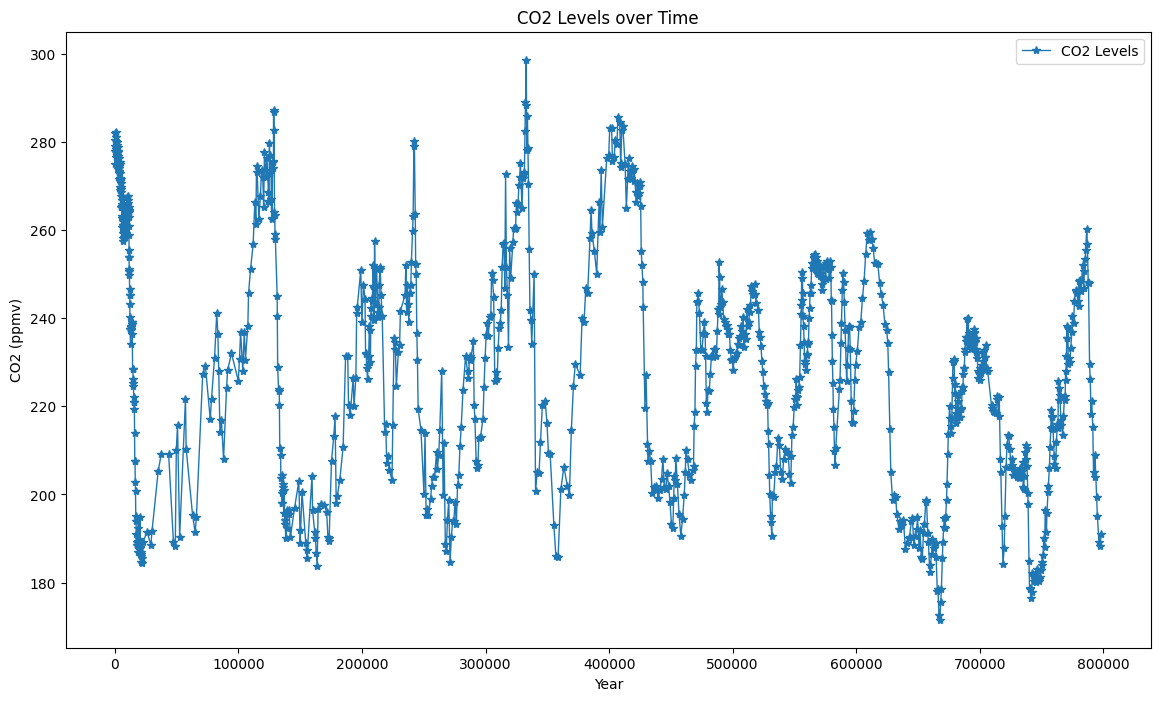

In [62]:
plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['CO2 (ppmv)'], marker='*', linewidth=1, label='CO2 Levels')
plt.title('CO2 Levels over Time')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
#plt.savefig('Antarctic Vostok and EPICA Dome C ice cores CO2 visualization.png')
plt.show()

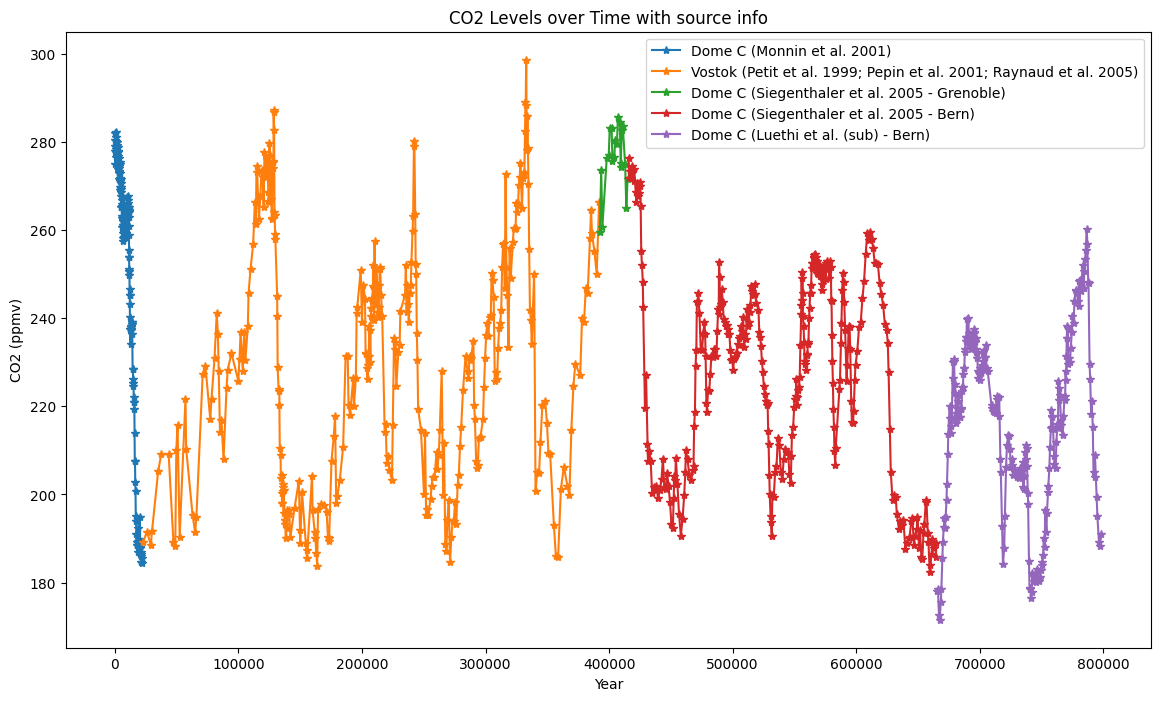

In [63]:
# Get unique sources
unique_sources = df['source'].unique()

plt.figure(figsize=(14, 8))
for source in unique_sources:
    subset = df[df['source'] == source]
    plt.plot(subset['Year'], subset['CO2 (ppmv)'], marker='*', label=source)

plt.title('CO2 Levels over Time with source info')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
#plt.savefig('Antarctic Vostok and EPICA Dome C ice cores CO2 visualization with colors.png')
plt.show()

The Antarctic Vostok and EPICA Dome C ice cores represent two deep drilling projects in the Dronning Maud Land (DML) region at Kohnen Station and Concordia Station (Dome C), respectively. These ice cores provide crucial data about past atmospheric conditions, offering insights into concentrations of various elements and compounds before routine atmospheric measurements began in 1958. Analyzing the air trapped within these ice cores offers a direct method to assess the concentrations of different substances, providing a glimpse into historical atmospheric compositions. Over the years, several research studies, including those conducted in Bern and Grenoble, have built upon the findings from the Vostok and EPICA Dome C ice core studies. These endeavors aimed to validate accuracy and explore additional methodologies to gather past data, enhancing our understanding of historical environmental conditions[14].

The visualizations presented above offer a compelling visual representation of carbon dioxide (CO2) concentration in the atmosphere as measured from various ice core samples. Covering approximately 800,000 years of Earth's history, the data reveals natural fluctuations in CO2 levels. A distinct cyclical pattern emerges, corresponding to Earth's glacial and interglacial periods. Glacial periods exhibit lower CO2 concentrations, while interglacial periods, including the current one, demonstrate higher levels. Despite diverse sources, there is remarkable consistency in the data, validating ice core records as reliable proxies for historical atmospheric conditions. Notably, the graph highlights a significant recent increase in CO2 levels, unprecedented in the natural variability observed over the last 800,000 years. This rise is attributed to human activities, particularly the combustion of fossil fuels.

2. IPCC CO2 Report Dataset

The second dataset utilized for the analysis of CO2 records from Antarctic ice cores corresponds to the CO2 dataset extracted from the IPCC report. The readme section within the report provides valuable insights for better comprehension. This dataset, representing a new iteration of the CO2 composite, supersedes the previous version by Lüthi et al. (2008). The age unit is denoted in years before present (yr BP), where "present" is defined as the year 1950. The dataset encompasses two main sheets: "all records" and "CO2 Composite." It's essential to note that not all records displayed in the "all records" sheet contribute to the composite dataset. The "all records" table proves beneficial for analyzing millennial-scale or finer details of the composite. This sheet offers comprehensive information, including the year, CO2 levels (ppmv), ice depth, sigma mean, and other details. However, for the current analysis, specific details such as ice depth and sigma mean might not be pertinent. 

Before comparing the IPCC report to the Luthi - Nature Paper one and determining which is better for our analysis, let's proceed to import data from both the "all records" and "CO2 composite" sheets. This step is crucial in assessing whether the "all records" dataset provides additional details that could enhance our analysis.

In [64]:
ipcc_report = pd.read_excel('dataset/CO2_data_from_IPCC_Report.xls', sheet_name='all records')

One significant challenge posed by the dataset is the horizontal arrangement of information, complicating the straightforward conversion of the file into a CSV format. To facilitate the conversion from .xls to .csv, preliminary data cleansing steps are required. An initial measure involves segmenting the dataset into distinct sets of years and rename each column, mirroring the approach employed during the analysis of the initial dataset.

In [65]:
# creating subcategories for the dataset
dome_c_monnin = ipcc_report.iloc[6:189, 2:4]
vostok_petit = ipcc_report.iloc [6:355, 7:9]
taylor_dome_indermuhle = ipcc_report.iloc [6:79, 10:12]
dome_c_siegenthaler_bern = ipcc_report.iloc [6:328, 15:17]
dome_c_siegenthaler_grenoble = ipcc_report.iloc [6:37, 20:22]
dome_c_luthi_bern = ipcc_report.iloc [6:257, 24:26]
dome_c_luthi_grenoble = ipcc_report.iloc [6:53, 29:31]
talos_dome_bereiter = ipcc_report.iloc [6:122, 34:36]
edml_bereiter =  ipcc_report.iloc [6:64, 39:41]
byrd_ahn = ipcc_report.iloc [6:177, 45:47]
edc_lourantou = ipcc_report.iloc [6:69, 50:52]
edc_lourantou_2010 = ipcc_report.iloc [6:45, 55:57]
edc_schmitt = ipcc_report.iloc [6:31, 60:62]
edc_schneider = ipcc_report.iloc [6:76, 65:67]
law_dome_macfarling = ipcc_report.iloc [6:142, 68:70]
wais_ahn = ipcc_report.iloc [6:115, 71:73]
edml_monnin = ipcc_report.iloc [6:101, 76:78]
law_dom_southpole_rubino = ipcc_report.iloc [6:338, 83:85]
siple_dome_ahn = ipcc_report.iloc [6:216, 89:91]
siple_dome_ahn_2014= ipcc_report.iloc [6:113, [93, 95]]
wais_marcott = ipcc_report.iloc [6:329, 98:100]
edc_bereiter = ipcc_report.iloc [6:398, 102:104]

In [66]:
# rename the columms
dome_c_monnin.rename(columns=({'Unnamed: 2':'year', 'Unnamed: 3':'CO2 (ppmv)'}), inplace=True)
vostok_petit.rename(columns=({'Unnamed: 7':'year', 'Unnamed: 8':'CO2 (ppmv)'}), inplace=True)
taylor_dome_indermuhle.rename(columns=({'Unnamed: 10':'year', 'Unnamed: 11':'CO2 (ppmv)'}), inplace=True)
dome_c_siegenthaler_bern.rename(columns=({'Unnamed: 15':'year', 'Unnamed: 16':'CO2 (ppmv)'}), inplace=True)
dome_c_siegenthaler_grenoble.rename(columns=({'Unnamed: 20':'year', 'Unnamed: 21':'CO2 (ppmv)'}), inplace=True) 
dome_c_luthi_bern.rename(columns=({'Unnamed: 24':'year', 'Unnamed: 25':'CO2 (ppmv)'}), inplace=True)
dome_c_luthi_grenoble.rename(columns=({'Unnamed: 29':'year', 'Unnamed: 30':'CO2 (ppmv)'}), inplace=True)
talos_dome_bereiter.rename(columns=({'Unnamed: 34':'year', 'Unnamed: 35':'CO2 (ppmv)'}), inplace=True) 
edml_bereiter.rename(columns=({'Unnamed: 39':'year', 'Unnamed: 40':'CO2 (ppmv)'}), inplace=True)
byrd_ahn.rename(columns=({'Unnamed: 45':'year', 'Unnamed: 46':'CO2 (ppmv)'}), inplace=True)
edc_lourantou.rename(columns=({'Unnamed: 50':'year', 'Unnamed: 51':'CO2 (ppmv)'}), inplace=True)
edc_lourantou_2010.rename(columns=({'Unnamed: 55':'year', 'Unnamed: 56':'CO2 (ppmv)'}), inplace=True)
edc_schmitt.rename(columns=({'Unnamed: 60':'year', 'Unnamed: 61':'CO2 (ppmv)'}), inplace=True)
edc_schneider.rename(columns=({'Unnamed: 65':'year', 'Unnamed: 66':'CO2 (ppmv)'}), inplace=True)
law_dome_macfarling.rename(columns=({'Law Dome (0-2 kyr BP)':'year', 'Unnamed: 69':'CO2 (ppmv)'}), inplace=True)
wais_ahn.rename(columns=({'Unnamed: 71':'year', 'Unnamed: 72':'CO2 (ppmv)'}), inplace=True)
edml_monnin.rename(columns=({'Unnamed: 76':'year', 'Unnamed: 77':'CO2 (ppmv)'}), inplace=True)
law_dom_southpole_rubino.rename(columns=({'Unnamed: 83':'year', 'Unnamed: 84':'CO2 (ppmv)'}), inplace=True)
siple_dome_ahn.rename(columns=({'Unnamed: 89':'year', 'Unnamed: 90':'CO2 (ppmv)'}), inplace=True)
siple_dome_ahn_2014.rename(columns=({'Unnamed: 93':'year', 'Unnamed: 95':'CO2 (ppmv)'}), inplace=True)
wais_marcott.rename(columns=({'Unnamed: 98':'year', 'Unnamed: 99':'CO2 (ppmv)'}), inplace=True)
edc_bereiter.rename(columns=({'Unnamed: 102':'year', 'Unnamed: 103':'CO2 (ppmv)'}), inplace=True)

To complete the data cleansing process, the pd.concat function is used to concatenate all the new subcategory datasets into a single consolidated dataset. This function is particularly useful because it allows for the combination of multiple dataframes along a particular axis (either rows or columns)[15].

In [67]:
concatenate = [dome_c_monnin, vostok_petit, taylor_dome_indermuhle, dome_c_siegenthaler_bern, dome_c_siegenthaler_grenoble, 
               dome_c_luthi_bern,dome_c_luthi_grenoble, talos_dome_bereiter, edml_bereiter, byrd_ahn,edc_lourantou,edc_lourantou_2010,edc_schmitt,
               edc_schneider,law_dome_macfarling,wais_ahn,edml_monnin,law_dom_southpole_rubino,
               siple_dome_ahn,siple_dome_ahn_2014,wais_marcott,edc_bereiter]
ipcc_co2_df = pd.concat(concatenate, ignore_index = True)

In [68]:
# store the csv file locally
ipcc_co2_df.to_csv ('dataset/annual-CO2-IPCC-Report.csv', index = None, header=True)
ipcc_co2_df = pd.read_csv('dataset/annual-CO2-IPCC-Report.csv')

In [69]:
# check if there are issues in the dataset
ipcc_co2_df.head()

,year,CO2 (ppmv)
0,350.110103,280.4
1,486.693200,274.9
2,501.195000,277.9
3,539.649455,279.1
4,539.894909,281.9


In [70]:
ipcc_co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3502 entries, 0 to 3501
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3497 non-null   float64
 1   CO2 (ppmv)  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


The dataset contains missing values and to ensure accurate visualization of the data, it is necessary to handle and remove all missing values from the dataset.

In [71]:
def remove_null_values(df):
    cleaned_df = df.dropna(subset=['year', 'CO2 (ppmv)'])
    return cleaned_df

new_ipcc_co2_df = remove_null_values(ipcc_co2_df)

It is also advisable to examine the dataset for duplicate entries pertaining to the year, as this could potentially introduce complications during the visualization process.

In [72]:
# Check for duplicates in the 'year' column
duplicates = new_ipcc_co2_df.duplicated(subset=['year'], keep=False)

In [73]:
# Display the number of duplicate years
print('Number of duplicate years:', duplicates.sum())

Number of duplicate years: 238


 After completing the dataset cleaning process by eliminating null values, it was observed that the year column contains 238 duplicate values. This situation could pose an issue, especially when plotting data, as multiple CO2 values for the same year might lead to a non-continuous line. To resolve this issue, a strategy of aggregating CO2 values by year is proposed. This involves calculating either the average or median CO2 value for each year, providing a more continuous and representative view of the data across different years.

In [74]:
ipcc_co2_df_no_dup = new_ipcc_co2_df.groupby('year')['CO2 (ppmv)'].mean().reset_index()

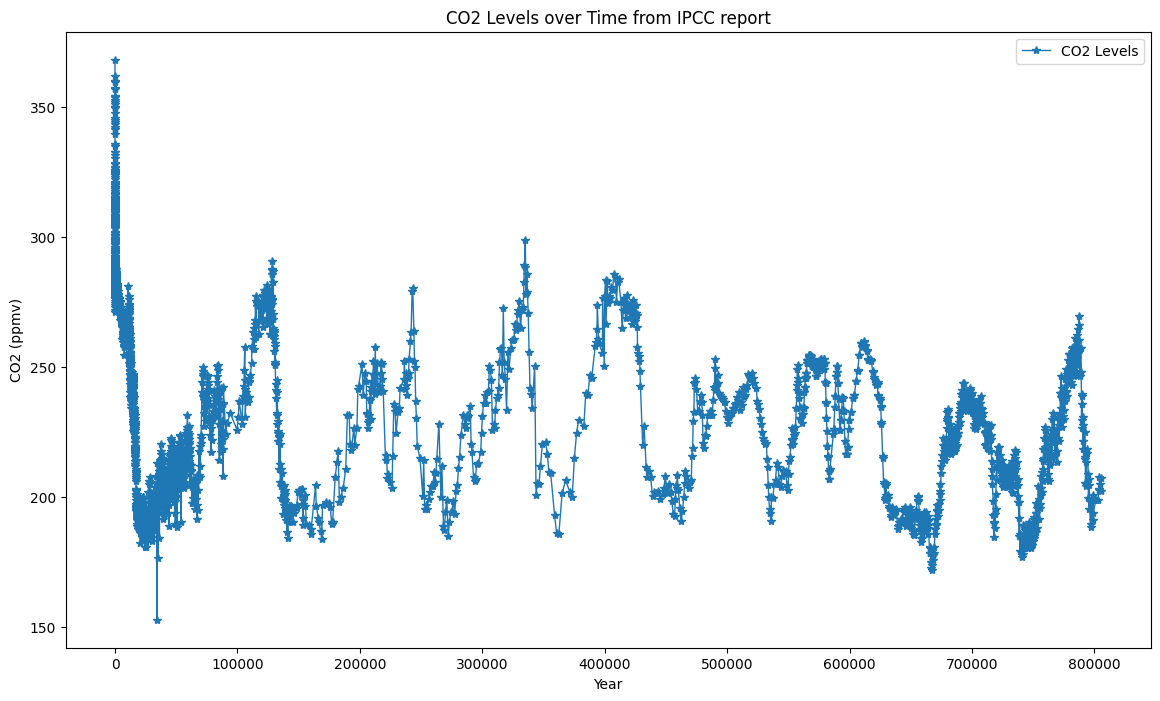

In [75]:
# visualize the dataset
plt.figure(figsize=(14, 8))
plt.plot(ipcc_co2_df_no_dup['year'], ipcc_co2_df_no_dup['CO2 (ppmv)'], linewidth=1, label='CO2 Levels', marker='*')
plt.title('CO2 Levels over Time from IPCC report')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
#plt.savefig('IPCC CO2 REport visualization.png')
plt.show()

Moving on to the CO2 Composite sheet, it is time to replicate the analysis previously conducted for the first two datasets.

In [76]:
# read the .xls file and convert it into .csv
read_file_ipcc = pd.read_excel ('dataset/CO2_data_from_IPCC_Report.xls', sheet_name='CO2 Composite')
read_file_ipcc.to_csv ('dataset/CO2-Composite-IPCC-Report.csv', index = None, header=True)

In [77]:
df_ipcc_composite = pd.read_csv('dataset/CO2-Composite-IPCC-Report.csv')

In [78]:
df_ipcc_composite = df_ipcc_composite.iloc[14:].reset_index(drop=True)

In [79]:
# rename the columns
df_ipcc_composite.rename(columns={
    'Composite CO2 record (0-800 kyr BP)': 'year',
    'Unnamed: 1': 'CO2 (ppmv)',
    'Unnamed: 2': 'sigma mean CO2 (ppmv)'
}, inplace=True)

In [80]:
df_ipcc_composite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   1901 non-null   object
 1   CO2 (ppmv)             1901 non-null   object
 2   sigma mean CO2 (ppmv)  1901 non-null   object
dtypes: object(3)
memory usage: 44.7+ KB


The decision has been made to exclude the sigma mean CO2 (ppmv) variable from the dataset, as it is currently not required for the analysis. 

In [81]:
df_ipcc_composite = df_ipcc_composite.drop('sigma mean CO2 (ppmv)', axis=1)

In [82]:
# convert columns to right datatype
df_ipcc_composite = df_ipcc_composite.astype({"year": float, "CO2 (ppmv)": float})

In [83]:
# adding the source column
df_ipcc_composite['source'] = 'Unknown'  # Default value

df_ipcc_composite.loc[:247, 'source'] = 'Law Dome (Rubino et al., 2013)'
df_ipcc_composite.loc[248:252, 'source'] = 'Law Dome (MacFarling Meure et al., 2006)'
df_ipcc_composite.loc[253:347, 'source'] = 'Dome C (Monnin et al., 2001 + 2004)'
df_ipcc_composite.loc[348:637, 'source'] = 'WAIS (Marcott et al., 2014)'
df_ipcc_composite.loc[638:832 , 'source'] = 'Siple Dome (Ahn et al., 2014)'
df_ipcc_composite.loc[833:910, 'source'] = 'TALDICE (Bereiter et al., 2012)'
df_ipcc_composite.loc[911:1004 , 'source'] = 'EDML (Bereiter et al., 2012)'
df_ipcc_composite.loc[1005:1076 , 'source'] = 'Dome C Sublimation (Schneider et al., 2013)'
df_ipcc_composite.loc[1077:1300 , 'source'] = 'Vostok (Petit et al., 1999)'
df_ipcc_composite.loc[1301:1590 , 'source'] = 'Dome C (Siegenthaler et al., 2005)'
df_ipcc_composite.loc[1591: , 'source'] = 'Dome C (Bereiter et al., 2014)'

In [84]:
df_ipcc_composite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1901 non-null   float64
 1   CO2 (ppmv)  1901 non-null   float64
 2   source      1901 non-null   object 
dtypes: float64(2), object(1)
memory usage: 44.7+ KB


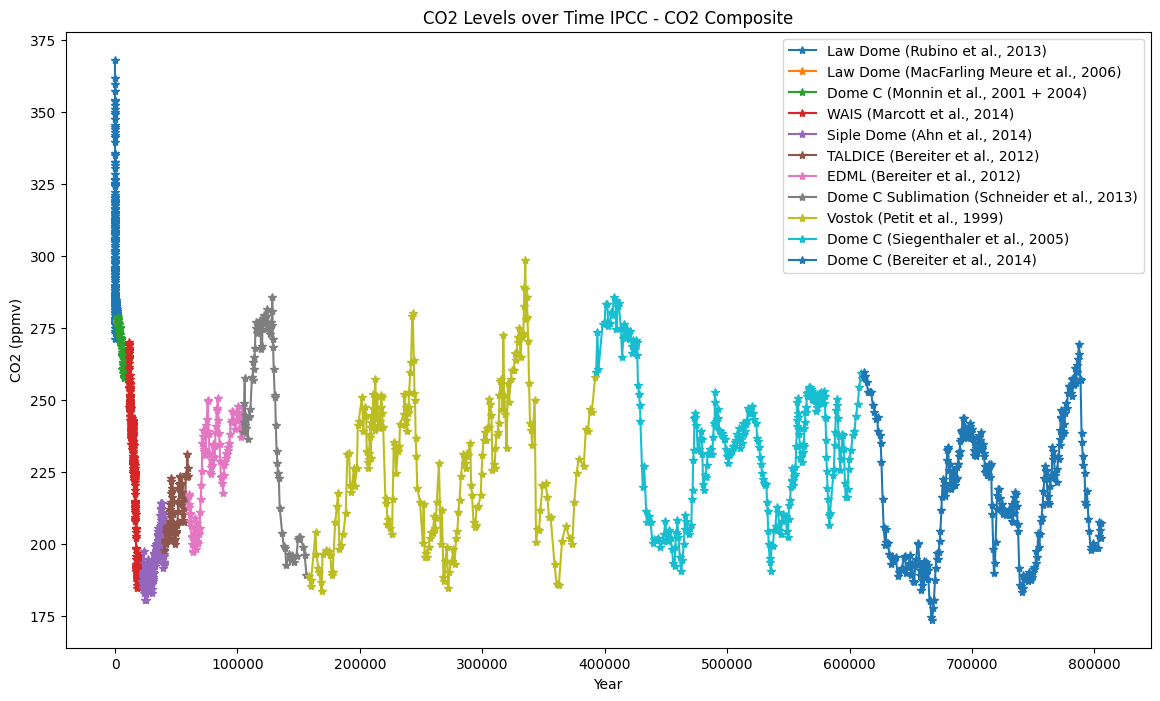

In [85]:
# visualize the dataset
unique_sources = df_ipcc_composite['source'].unique()

plt.figure(figsize=(14, 8))
for source in unique_sources:
    subset = df_ipcc_composite[df_ipcc_composite['source'] == source]
    plt.plot(subset['year'], subset['CO2 (ppmv)'], marker='*', label=source)

plt.title('CO2 Levels over Time IPCC - CO2 Composite')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
#plt.savefig('IPCC - CO2 Composite: CO2 visualization with colors.png')
plt.show()

In the final step, visualizing the two datasets retrieved from the IPCC report becomes crucial to assess the presence of a strong correlation between them. The process involves creating plots that allow a comprehensive examination of the relationship between the variables in both datasets.

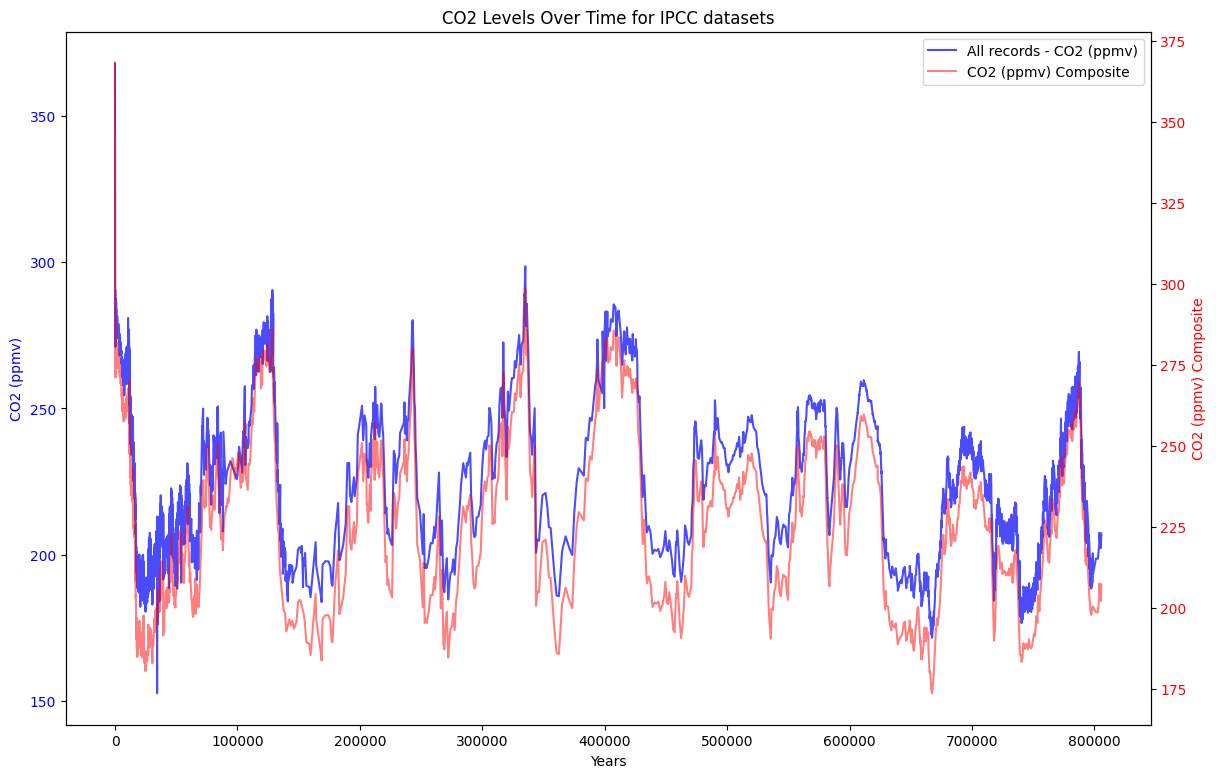

In [86]:
x1 = ipcc_co2_df_no_dup['year']
x2 = df_ipcc_composite['year']
y1 = ipcc_co2_df_no_dup['CO2 (ppmv)'] 
y2 = df_ipcc_composite['CO2 (ppmv)']

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='All records - CO2 (ppmv)', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 (ppmv)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='CO2 (ppmv) Composite', alpha=0.5)
ax2.set_ylabel('CO2 (ppmv) Composite', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('CO2 Levels Over Time for IPCC datasets')
#plt.savefig('CO2 Levels Over Time for IPCC datasets.png')
plt.show()

The plotted data indicates a robust correlation between the two C02 (ppmv) datasets, with slight variations observed over the course of the years. This discrepancy might be attributed to the composite sheet offering less information when compared to the all records sheet. Consequently, the dataset from the all records sheet will be considered for further comparison with the  dataset.

Now, the next and last step involves comparing the IPCC report with Luthi's Nature paper to identify potential differences between the two sources. This comparative analysis aims to uncover any disparities or variations in the information presented in these documents.

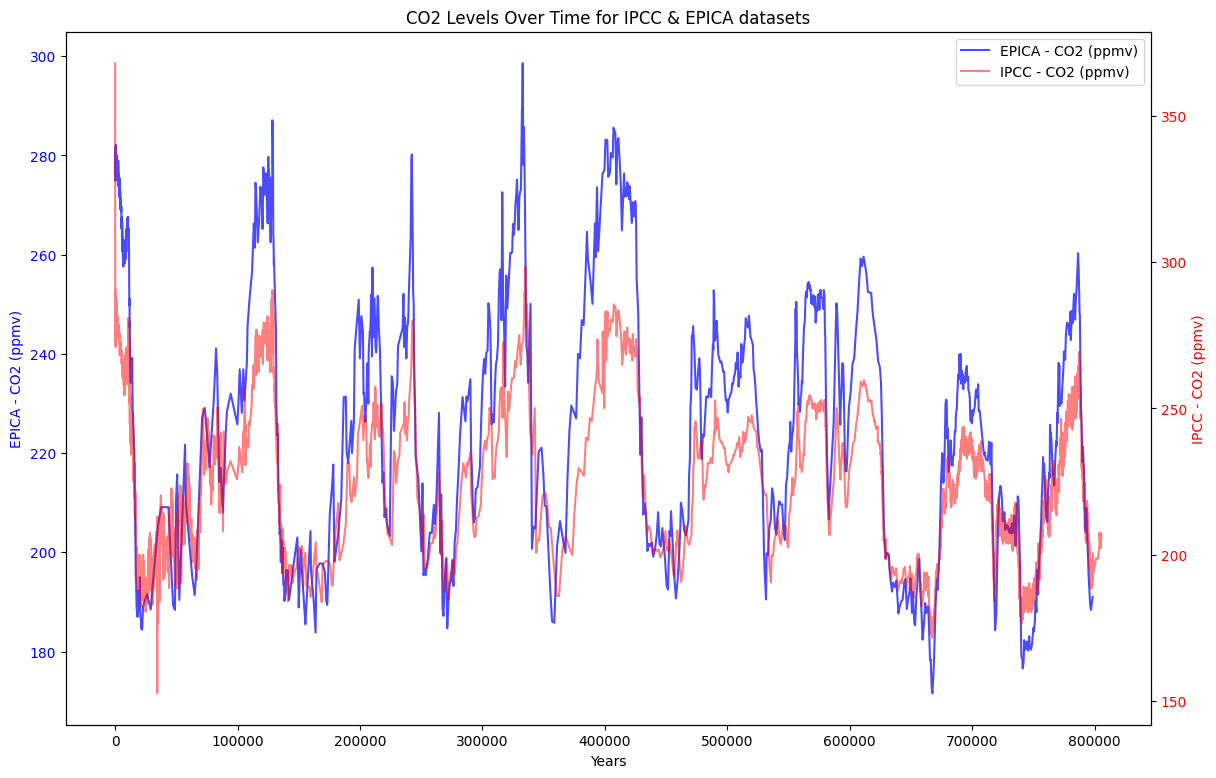

In [87]:
x1 = df['Year']
x2 = ipcc_co2_df_no_dup['year']
y1 = df['CO2 (ppmv)'] 
y2 = ipcc_co2_df_no_dup['CO2 (ppmv)']

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='Luthi - Nature Paper - CO2 (ppmv)', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('Luthi - Nature Paper - CO2 (ppmv)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='IPCC - CO2 (ppmv)', alpha=0.5)
ax2.set_ylabel('IPCC - CO2 (ppmv)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('CO2 Levels Over Time for IPCC & Luthi - Nature Paper datasets')
#plt.savefig('CO2 Levels Over Time for IPCC & Luthi - Nature Paper datasets.png')
plt.show()

The data performance appears to be consistently similar across almost all the years, with the primary distinction lying in the consideration of the number of CO2 (ppmv) in the two datasets. Deciding which dataset to prioritize for further analysis is challenging based solely on the presented image. To make a more informed decision, it's crucial to incorporate temperature data and compare it with both datasets. By assessing the correlation between each dataset and the temperature data, we can determine which CO2 dataset exhibits a stronger relationship. The outcome of this comparison will guide the selection of the more accurate CO2 dataset for subsequent analyses.

Datset Tempeature

In [88]:
read_file = pd.read_excel (r'epicaDC.deuttemp.EDC3-AICC temperature.xls')
read_file.to_csv (r'temperature.csv', index = None, header=True)

In [89]:
df_temperature = pd.DataFrame(pd.read_csv("temperature.csv"))

#### Data Exploration for Dataset 1

In [90]:
df.head()

,Year,CO2 (ppmv),source
0,137,280.4,Dome C (Monnin et al. 2001)
1,268,274.9,Dome C (Monnin et al. 2001)
2,279,277.9,Dome C (Monnin et al. 2001)
3,395,279.1,Dome C (Monnin et al. 2001)
4,404,281.9,Dome C (Monnin et al. 2001)


In [91]:
print(f'The dimensions of the dataset are: {df.shape}')
print(f'The number of row are: {df.shape[0]}')
print (f'The number of Attributes are: {df.shape[1]}')

The dimensions of the dataset are: (1096, 3)
The number of row are: 1096
The number of Attributes are: 3


In [92]:
print('Find below the full summary of the Dataset:\n')
df.info()

Find below the full summary of the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        1096 non-null   int32  
 1   CO2 (ppmv)  1096 non-null   float64
 2   source      1096 non-null   object 
dtypes: float64(1), int32(1), object(1)
memory usage: 21.5+ KB


In [93]:
# https://sparkbyexamples.com/pandas/pandas-change-column-data-type-dttype/#:~:text=astype()%20to%20Change%20Data,types%20to%20the%20same%20type.
# Change Type For One or Multiple Columns
df = df.astype({"Year": int, "CO2 (ppmv)": float})

In [94]:
print('The missing values are:')
df.isnull().sum()

The missing values are:


Year          0
CO2 (ppmv)    0
source        0
dtype: int64

In [95]:
print(f'The number of Duplicated Rows is: {df.duplicated().sum()}')


The number of Duplicated Rows is: 0


#### Data Exploration for Dataset 2

In [96]:
df_temperature.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [97]:
print(f'The dimensions of the dataset are: {df_temperature.shape}')
print(f'The number of row are: {df_temperature.shape[0]}')
print (f'The number of Attributes are: {df_temperature.shape[1]}')

The dimensions of the dataset are: (5819, 7)
The number of row are: 5819
The number of Attributes are: 7


In [98]:
print('Find below the full summary of the Dataset:\n')
df_temperature.info()

Find below the full summary of the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bag           5819 non-null   int64  
 1   ztop          5819 non-null   float64
 2   EDC3béta      5819 non-null   float64
 3   AICC2012      5819 non-null   float64
 4   deutfinal     5804 non-null   float64
 5   temp          5819 non-null   float64
 6   acc-EDC3beta  5819 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.4 KB


In [99]:
print('The missing values are:')
df_temperature.isnull().sum()

The missing values are:


bag              0
ztop             0
EDC3béta         0
AICC2012         0
deutfinal       15
temp             0
acc-EDC3beta     0
dtype: int64

In [100]:
print(f'The number of Duplicated Rows is: {df_temperature.duplicated().sum()}')

The number of Duplicated Rows is: 0


#### temperature over time

Jouzel temperature

In [101]:
df_temperature

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


Text(0.5, 1.0, 'Temperature over Time')

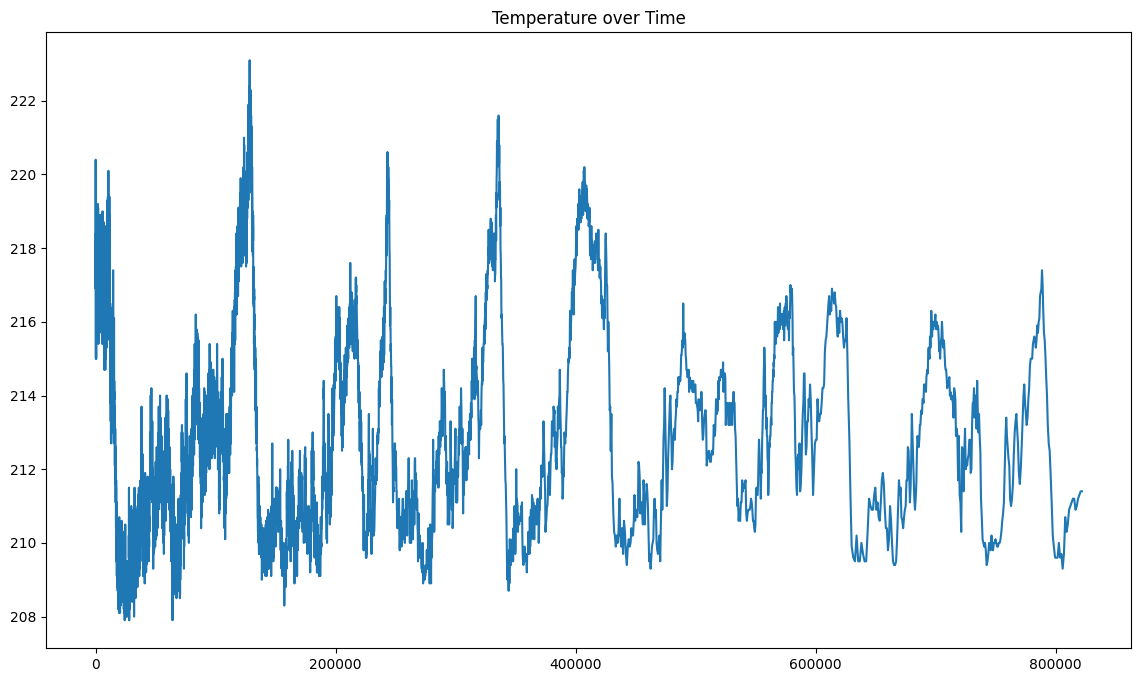

In [102]:
plt.figure(figsize=(14, 8))
plt.plot(df_temperature['AICC2012'], df_temperature['temp'])
plt.title('Temperature over Time')

NOAA temperature - edc3deuttemp2007.txt

In [103]:
nooa_temperature = pd.read_csv('edc3deuttemp2007.txt', delimiter='\s+', on_bad_lines='warn')
nooa_temperature.to_csv ('temperature-NOAA.csv', index = None)


Skipping line 29: expected 11 fields, saw 12
Skipping line 30: expected 11 fields, saw 12
Skipping line 31: expected 11 fields, saw 12
Skipping line 32: expected 11 fields, saw 12
Skipping line 39: expected 11 fields, saw 12
Skipping line 40: expected 11 fields, saw 12
Skipping line 55: expected 11 fields, saw 12
Skipping line 68: expected 11 fields, saw 12
Skipping line 69: expected 11 fields, saw 17
Skipping line 89: expected 11 fields, saw 14



In [104]:
nooa_temperature = pd.DataFrame(pd.read_csv('temperature-NOAA.csv'))

In [105]:
nooa_temperature = nooa_temperature.iloc[59:].reset_index(drop=True)

In [106]:
columns_to_remove = ["800KYr", "Deuterium", "Data", "and", "Temperature", "Estimates"]
nooa_temperature = nooa_temperature.drop(columns=columns_to_remove)


In [107]:
nooa_temperature.rename(columns={
    'EPICA': 'Bag',
    'Dome': 'ztop',
    'C': 'Age',
    'Ice': 'Deuterium',
    'Core': 'Temperature'
}, inplace=True)

In [108]:
nooa_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bag          5800 non-null   object
 1   ztop         5800 non-null   object
 2   Age          5800 non-null   object
 3   Deuterium    5788 non-null   object
 4   Temperature  5785 non-null   object
dtypes: object(5)
memory usage: 226.7+ KB


In [109]:
nooa_temperature = nooa_temperature.astype({"Bag": int, "ztop": float,
                                            "Age": float, "Deuterium": float,
                                            "Temperature": float})

In [110]:
nooa_temperature.head()

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN


Text(0.5, 1.0, 'Temperature over Time')

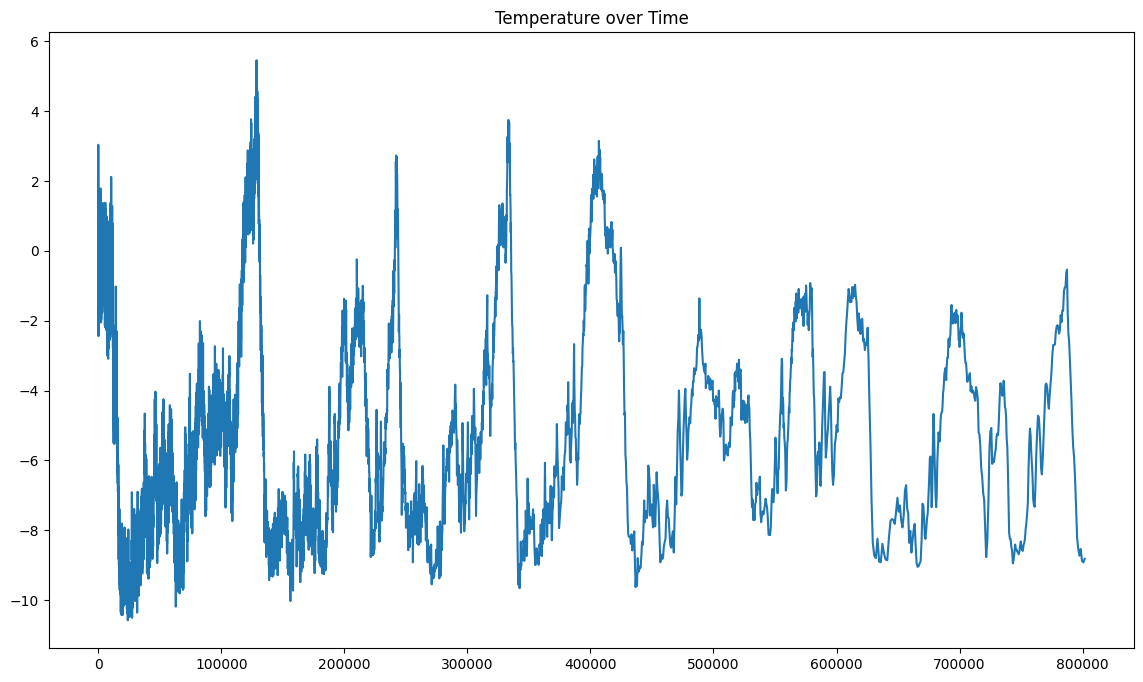

In [111]:
plt.figure(figsize=(14, 8))
plt.plot(nooa_temperature['Age'], nooa_temperature['Temperature'])
plt.title('Temperature over Time')

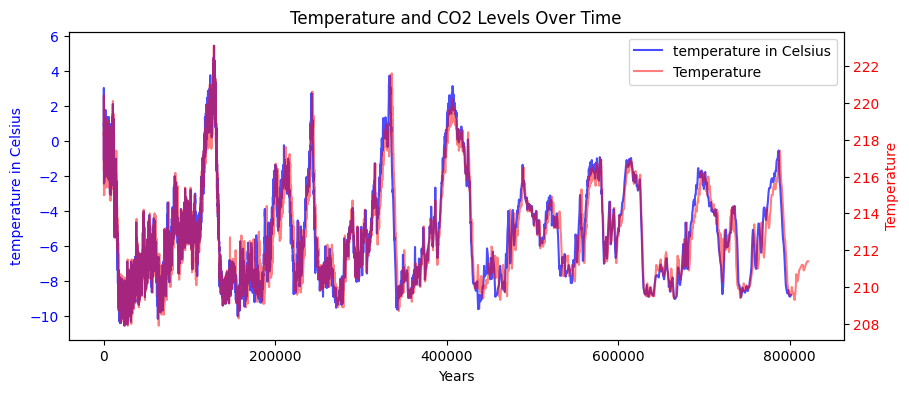

In [112]:
# https://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/

x1 = nooa_temperature['Age']
x2 = df_temperature['AICC2012']
y1 = nooa_temperature['Temperature'] 
y2 = df_temperature['temp']

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(x1, y1, 'b-', label='temperature in Celsius', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('temperature in Celsius', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='Temperature', alpha=0.5)
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Temperature and CO2 Levels Over Time')
plt.show()




To understand how the temperature on the right is calculated, we would need additional context or a formula that is not visible in the image. It could represent a different temperature scale, a calculated index, or a proxy for temperature changes over time, such as anomalies or deviations from a baseline.

Without further information, it's not possible to determine the exact nature of the red line's temperature scale. If there is additional context or data provided in the screenshot or accompanying documentation, that could help clarify the calculation method.

#### Add CO2 with Temperature

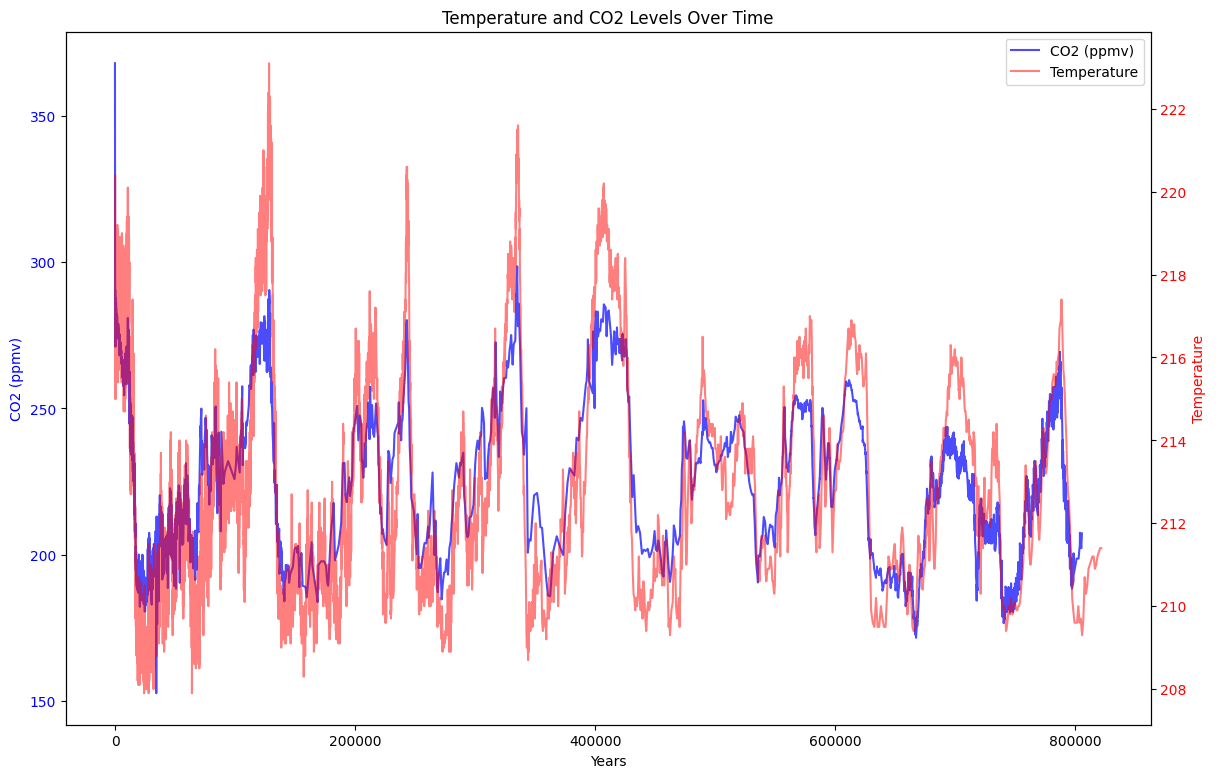

In [120]:
x1 = ipcc_co2_df_no_dup['year']
x2 = df_temperature['AICC2012']
y1 = ipcc_co2_df_no_dup['CO2 (ppmv)'] 
y2 = df_temperature['temp']

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='CO2 (ppmv)', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 (ppmv)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='Temperature', alpha=0.5)
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Temperature and CO2 Levels Over Time')
plt.show()

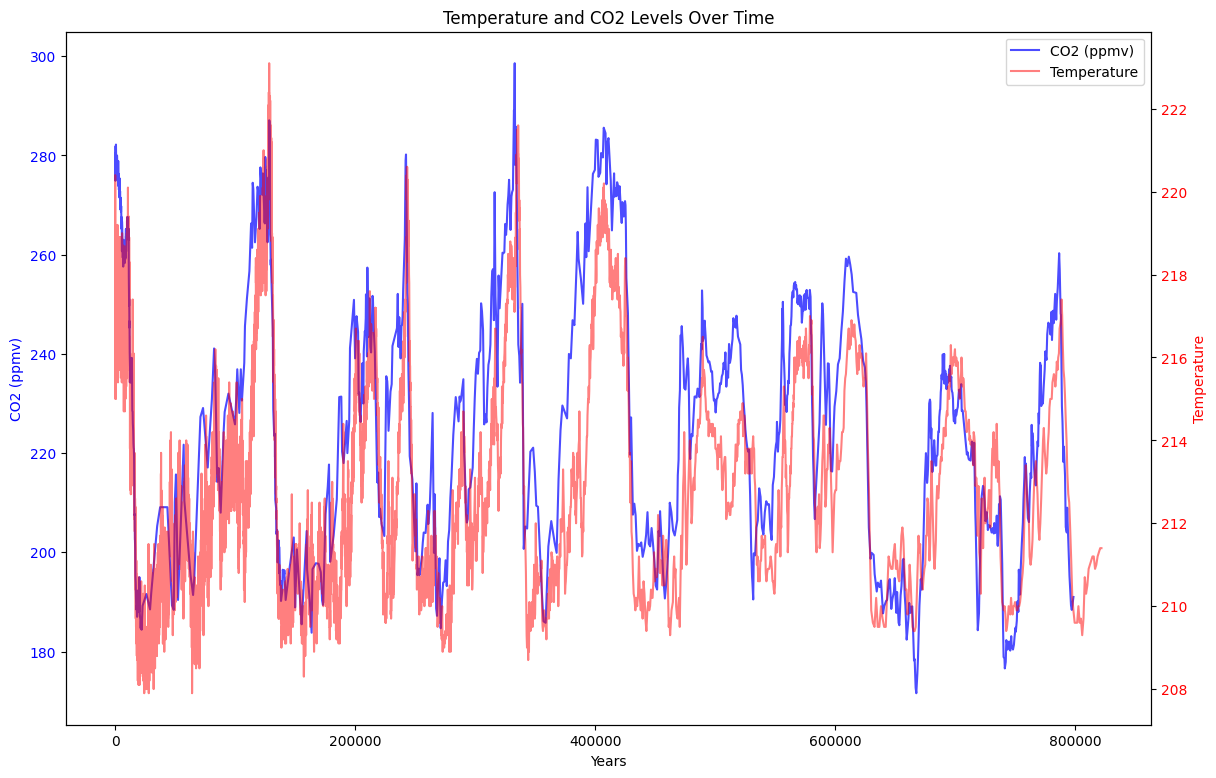

In [113]:
# https://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/

x1 = df['Year']
x2 = df_temperature['AICC2012']
y1 = df['CO2 (ppmv)'] 
y2 = df_temperature['temp']

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='CO2 (ppmv)', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 (ppmv)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='Temperature', alpha=0.5)
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Temperature and CO2 Levels Over Time')
plt.show()




#### Amount of Atmospheric Carbon Dioxide from 1960 to present

In [114]:
# source = https://gml.noaa.gov/ccgg/trends/data.html
# added the parameters skiprows=40 to properly skip the header lines
modern_Co2_df = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv', skiprows=40)

In [115]:
# https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

# Convert 'year' and 'month' to a single datetime column
modern_Co2_df['date'] = pd.to_datetime(modern_Co2_df[['year', 'month']].assign(day=1))

# Drop the original 'year' and 'month' columns if needed
modern_Co2_df = modern_Co2_df.drop(['year', 'month'], axis=1)

# Display the modified DataFrame
print(modern_Co2_df)



     decimal date  average  deseasonalized  ndays  sdev   unc       date
0       1958.2027   315.70          314.43     -1 -9.99 -0.99 1958-03-01
1       1958.2877   317.45          315.16     -1 -9.99 -0.99 1958-04-01
2       1958.3699   317.51          314.71     -1 -9.99 -0.99 1958-05-01
3       1958.4548   317.24          315.14     -1 -9.99 -0.99 1958-06-01
4       1958.5370   315.86          315.18     -1 -9.99 -0.99 1958-07-01
..            ...      ...             ...    ...   ...   ...        ...
784     2023.5417   421.83          421.45     21  0.48  0.20 2023-07-01
785     2023.6250   419.68          421.57     21  0.45  0.19 2023-08-01
786     2023.7083   418.51          421.95     18  0.30  0.14 2023-09-01
787     2023.7917   418.82          422.10     27  0.47  0.17 2023-10-01
788     2023.8750   420.46          422.48     21  0.88  0.37 2023-11-01

[789 rows x 7 columns]


csv file has been also added in the repository under the name: Co2_annual_1958_to_2023

Text(0.5, 1.0, 'Atmospheric CO2 at Mauna Loa Observatory')

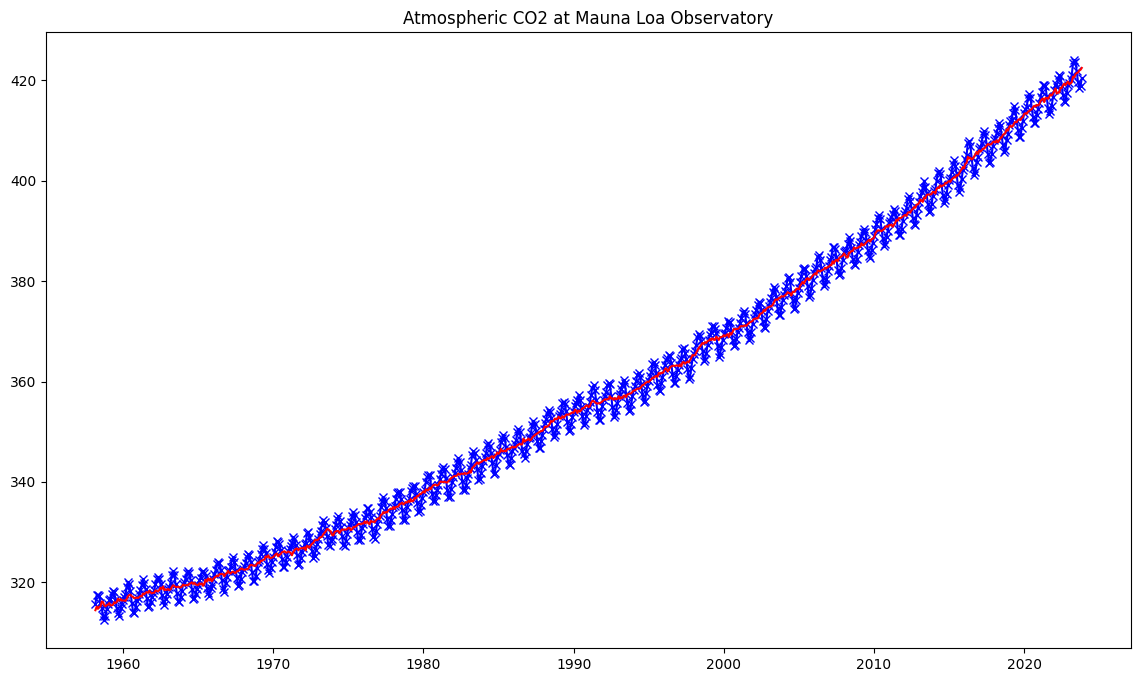

In [116]:
plt.figure(figsize=(14, 8))
plt.plot(modern_Co2_df['date'], modern_Co2_df['average'], marker='x', linestyle='-', label='Interpolated', color='blue')
plt.plot(modern_Co2_df['date'], modern_Co2_df['deseasonalized'], linestyle='-', label='Trend', color='red')

plt.title('Atmospheric CO2 at Mauna Loa Observatory')

#### Temperature levels from 1960 to present

In [117]:
# https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/ytd/1/1850-2023?trend=true&trend_base=100&begtrendyear=1850&endtrendyear=2023&filter=true&filterType=binomial

modern_temperature_df = pd.read_csv('https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/ytd/1/1850-2023/data.csv?trend=true&trend_base=100&begtrendyear=1850&endtrendyear=2023&filter=true&filterType=binomial', skiprows=4)


In [118]:
modern_temperature_df

,Year,Anomaly
0,1850,-0.37
1,1851,-0.12
2,1852,-0.15
3,1853,0.00
4,1854,-0.23
...,...,...
169,2019,0.91
170,2020,1.13
171,2021,0.83
172,2022,0.93


Text(0.5, 1.0, 'Temperture Aomalies')

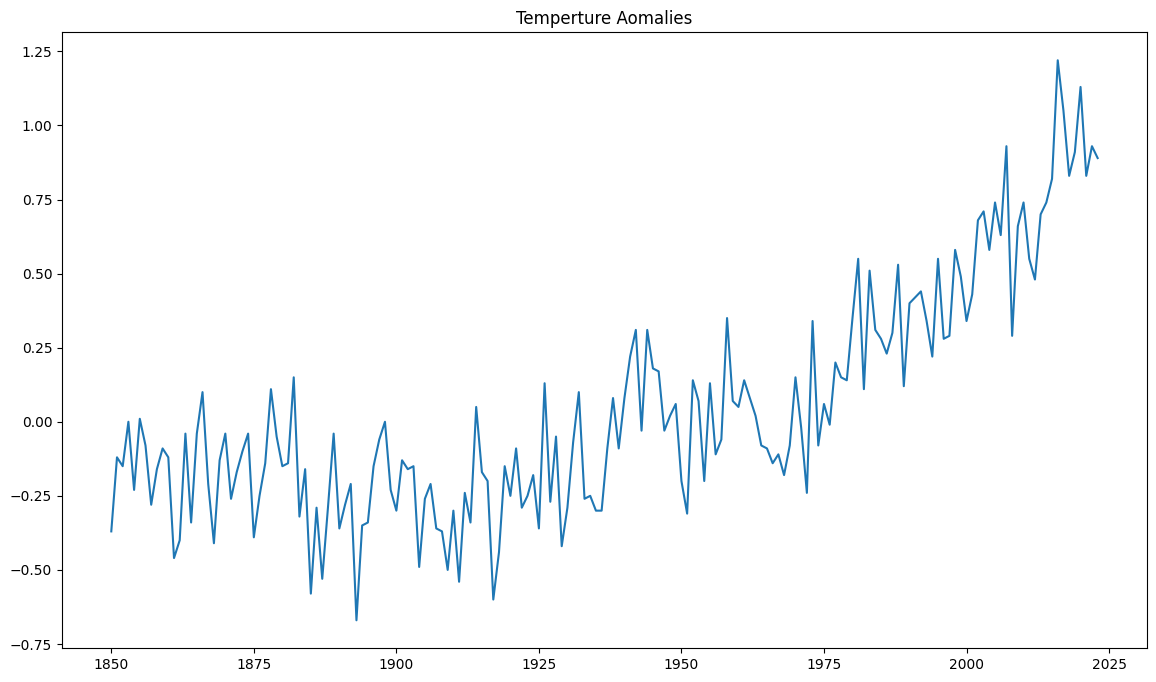

In [119]:
plt.figure(figsize=(14, 8))
plt.plot(modern_temperature_df['Year'], modern_temperature_df['Anomaly'])

plt.title('Temperture Aomalies')

### References

[1]: Chugh v., [2023]. "Python pandas tutorial: The ultimate guide for beginners". [Datacamp](https://www.datacamp.com/tutorial/pandas)

[2]: matplotlib, [n.d.]. "matplotlib.pyplot". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

[3]: Zach, [2021]. "The Easiest Way to Use NumPy: import numpy as np". [Statology](https://www.statology.org/import-numpy-as-np/#:~:text=The%20import%20numpy%20portion%20of,function_name%20rather%20than%20numpy.)

[4]: Scipy, [n.d.]. "Statistical functions (scipy.stats)". [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

[5]: Seaborn, [n.d.]. "An introduction to seaborn". [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

[6] Data to Fish, (2021). "*Convert Excel to CSV using Python (example included)*". [Data to Fish](https://datatofish.com/excel-to-csv-python/)

[7] Pankaj, (2022). "*Pandas to_csv() - Convert DataFrame to CSV*". [DigitalOcean](https://www.digitalocean.com/community/tutorials/pandas-to_csv-convert-dataframe-to-csv)

[8] Barney H., (2020). "*How to read CSV File into Python using Pandas*". [Towards Datascience](https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58)

[9] Geeks for Geeks, (n.d.). "*How to rename multiple column headers in a Pandas DataFrame?*". [Geeks for Geeks](https://www.geeksforgeeks.org/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/)

[10] Vijetha, (2023). "*Pandas Drop the First Row of DataFrame*". [Spark By Examples](https://sparkbyexamples.com/pandas/pandas-drop-first-row-of-dataframe/#:~:text=You%20can%20delete%2Fdrop%20the,%5B%5D%20and%20tail()%20methods)

[11] Pandas, (n.d.). "*pandas.DataFrame.reset_index*". [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

[12] Geeks for Geeks, (n.d.). "*How to print an entire Pandas DataFrame in Python?*". [Geeks for Geeks](https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/)

[13] Naveen, (2023). "*Different Ways to Change Data Type in pandas*". [Spark By Examples](https://sparkbyexamples.com/pandas/pandas-change-column-data-type-dttype/#:~:text=astype()%20to%20Change%20Data,types%20to%20the%20same%20type)

[14] Lüthi, D., Le Floch, M., Bereiter, B. et al., (2008). "*High-resolution carbon dioxide concentration record 650,000–800,000 years before present*". Nature 453, 379–382 (2008). [Nature](https://doi.org/10.1038/nature06949)

[15] Capitol One Tech, (2023). "*Pandas DataFrame: How to concatenate with Python examples*". [Capitol One](https://www.capitalone.com/tech/open-source/pandas-dataframe-concat/)

***
End